In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
# E+S===ES-->E+P

# Define some constants
E=1
S=10
ES=0
P=0

k1=100
k2=600
k3=150

n=0
t=0

h=0.00002

# Define few lists to record the result
nlist=[]
tlist=[]
elist=[]
slist=[]
eslist=[]
plist=[]
vlist=[]

In [3]:
#define the function to calculate the fourth-order Runge- Kutta method's result
def KL4(Et,St,t,h,n):
    K1=func1(t,Et,St)
    G1=func2(t,Et,St)
    K2=func1(t+(1/2)*h,Et+(1/2)*h*K1,St+(1/2)*h*G1)
    G2=func2(t+(1/2)*h,Et+(1/2)*h*K1,St+(1/2)*h*G1)
    K3=func1(t+(1/2)*h,Et+(1/2)*h*K2,St+(1/2)*h*G2)
    G3=func2(t+(1/2)*h,Et+(1/2)*h*K2,St+(1/2)*h*G2)
    K4=func1(t+h,Et+h*K3,St+h*G3)
    G4=func2(t+h,Et+h*K3,St+h*G3)
    
    e=Et+(1/6)*h*(K1+2*K2+2*K3+K4)
    s=St+(1/6)*h*(G1+2*G2+2*G3+G4)
    
    elist.append(e)
    slist.append(s)

In [4]:
#define the function to describe Et changes by t
def func1(t,Et,St):
    return k2*(1-Et)-k1*Et*St+k3*(1-Et)

In [5]:
#define the function to describe St changes by t
def func2(t,Et,St):
    return k2*(1-Et)-k1*Et*St

In [7]:
#define the main program to improve the robustness
def main():
    nlist.append(n)
    tlist.append(t)
    elist.append(E)
    slist.append(S)
    eslist.append(ES)
    plist.append(P)
    i=0
    N=n
    T=t
    while 1:
        KL4(elist[i],slist[i],tlist[i],h,nlist[i])
        N=N+1
        nlist.append(N)
        T=T+h
        tlist.append(T)
        ESt=1-elist[i+1]
        eslist.append(ESt)
        #Pt=10-slist[i+1]-eslist[i+1]
        Pt=plist[i]+h*k3*eslist[i+1]
        plist.append(Pt)
        
        
        #if(k3*eslist[i+1]<0.00000000000000001):
        if(elist[i+1]-elist[i]<0.00000000000000001 and slist[i+1]-slist[i]<0.00000000000000001 and eslist[i+1]-eslist[i]<0.00000000000000001 and plist[i+1]-plist[i]<0.00000000000000001):
        #if(i==2080):
            break
        
        i=i+1
        
    for pp in range (0,len(eslist)):
        vlist.append(eslist[pp]*k3)
    
    totallist=[]
    totallist.append(nlist)
    totallist.append(tlist)
    totallist.append(elist)
    totallist.append(slist)
    totallist.append(eslist)
    totallist.append(plist)
    totallist.append(vlist)
    
    df=pd.DataFrame(totallist)
    df_T=pd.DataFrame(df.values.T,columns=['n','time','[E]','[S]','[ES]','[P]','v'])
    
    print(df_T)
    
    df_T.to_csv("/Users/hanweiyu/Desktop/bmds.csv")

In [8]:
if __name__ == '__main__':
    main()

             n     time       [E]           [S]          [ES]       [P]  \
0          0.0  0.00000  1.000000  1.000000e+01  0.000000e+00  0.000000   
1          1.0  0.00002  0.980365  9.980336e+00  1.963476e-02  0.000059   
2          2.0  0.00004  0.961442  9.961325e+00  3.855767e-02  0.000175   
3          3.0  0.00006  0.943204  9.942944e+00  5.679582e-02  0.000345   
4          4.0  0.00008  0.925625  9.925168e+00  7.437517e-02  0.000568   
...        ...      ...       ...           ...           ...       ...   
84141  84141.0  1.68282  1.000000  1.876455e-12  2.539080e-13  9.999995   
84142  84142.0  1.68284  1.000000  1.875750e-12  2.537970e-13  9.999995   
84143  84143.0  1.68286  1.000000  1.875044e-12  2.536860e-13  9.999995   
84144  84144.0  1.68288  1.000000  1.874339e-12  2.535749e-13  9.999995   
84145  84145.0  1.68290  1.000000  1.873634e-12  2.535749e-13  9.999995   

                  v  
0      0.000000e+00  
1      2.945214e+00  
2      5.783651e+00  
3      8.51

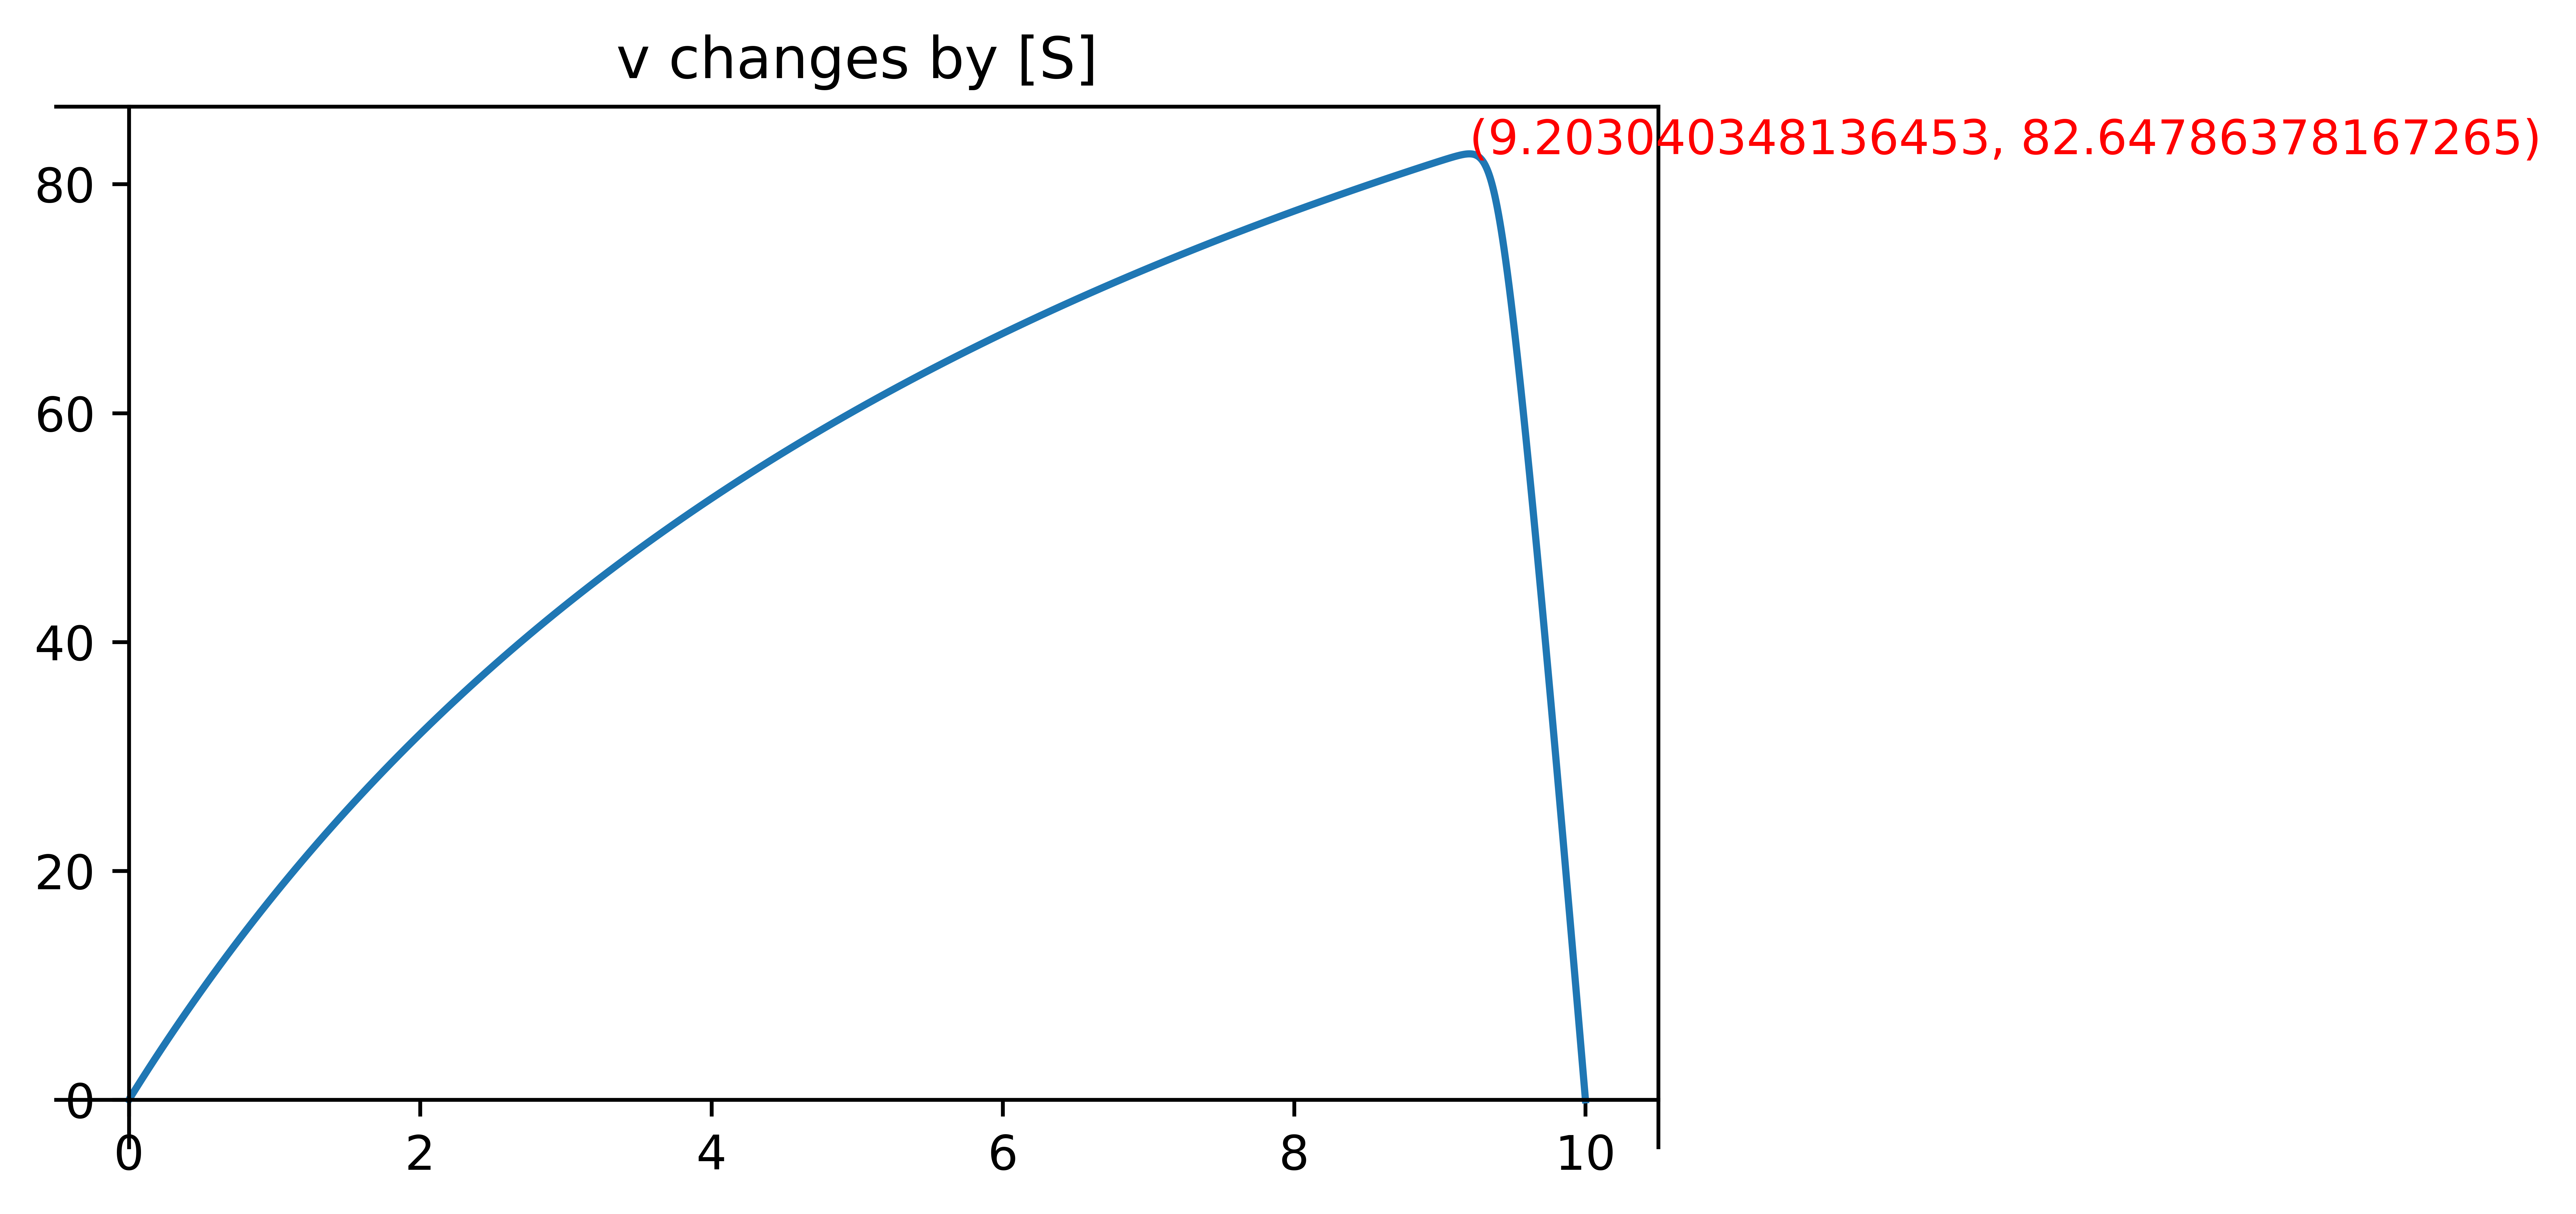

In [10]:
fig=plt.figure(dpi=1200)
p1=fig.add_subplot(111)
p1.spines['bottom'].set_position(('data',0))
p1.spines['left'].set_position(('data',0))
p1.plot(slist,vlist)
#plt.legend(loc='best')
plt.title('v changes by [S]')
#plt.xlable('[S]',fontsize=14)
#plt.ylable('v',fontsize=14)
    
for i in range(1,len(slist)):
    if vlist[i]>vlist[i+1]:
        p1.text(slist[i],vlist[i],(slist[i],vlist[i]),c='red')
        break

plt.savefig('/Users/hanweiyu/Desktop/bmds.png')
plt.show()